## Dane

In [1]:
import pandas as pd

dataframe = pd.read_csv("./data/spam.dat")

X = dataframe.drop(['target'], axis = 1)
y = dataframe.target

print(X.shape)
print(y.shape)

(4789, 462)
(4789,)


## Klasyfikator - Multi Layer Perceptron (MLPClassifier)

In [2]:
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

def MultiLayerPerceptronClassification(layers):
    clf = MLPClassifier(hidden_layer_sizes = layers, max_iter=1000, random_state = 123)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(clf, X_test, y_test)     
    report = classification_report(y_test, y_pred, output_dict=True)
    
    FNR = round((1 - report['yes']['recall']) * 100, 2)
    FPR = round((1 - report['no']['recall']) * 100, 2)
    
    print(
        'Hidden layers:', layers,
        ' | FNR:', FNR, ' %',
        ' | FPR:', FPR, ' % |\n'
    )
    
    plt.show()
    
    return FNR, FPR

## Parametry klasyfikatora

* Liczba neuronów w warstwie ukrytej (10, 50, 100, 150, 200)
* Liczba wartstw ukrytych (1, 2, 3)

Hidden layers: 10  | FNR: 3.95  %  | FPR: 0.4  % |



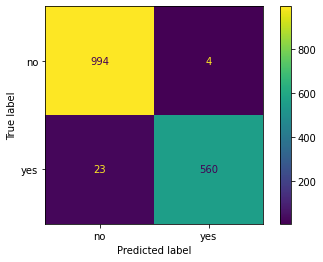

Hidden layers: 50  | FNR: 4.46  %  | FPR: 0.5  % |



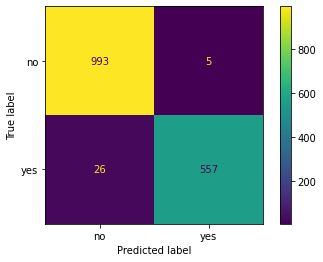

Hidden layers: 100  | FNR: 4.29  %  | FPR: 0.5  % |



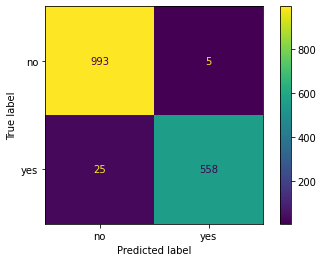

Hidden layers: 150  | FNR: 4.29  %  | FPR: 0.5  % |



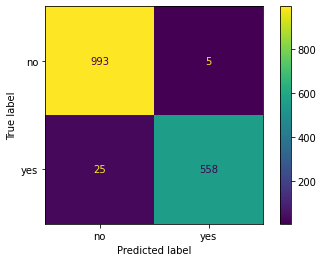

Hidden layers: 200  | FNR: 4.12  %  | FPR: 0.3  % |



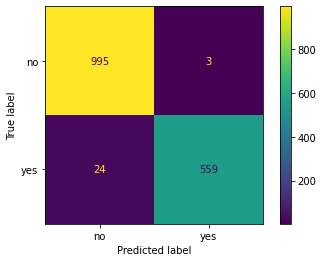

Hidden layers: (10, 10)  | FNR: 3.95  %  | FPR: 0.5  % |



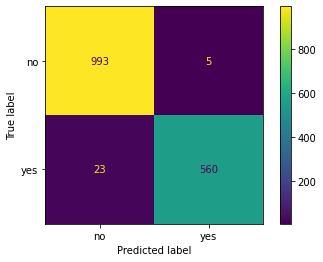

Hidden layers: (50, 50)  | FNR: 4.46  %  | FPR: 0.4  % |



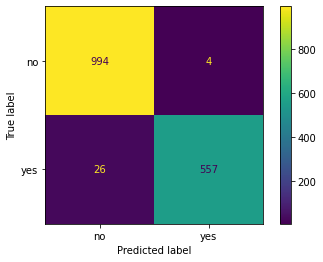

Hidden layers: (100, 100)  | FNR: 4.12  %  | FPR: 0.4  % |



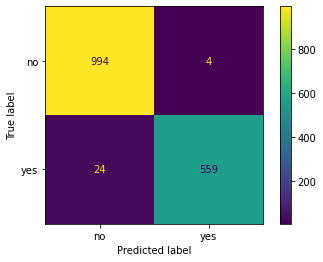

Hidden layers: (150, 150)  | FNR: 4.12  %  | FPR: 0.2  % |



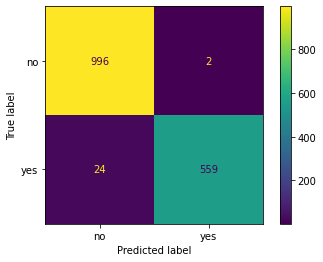

Hidden layers: (200, 200)  | FNR: 4.29  %  | FPR: 0.3  % |



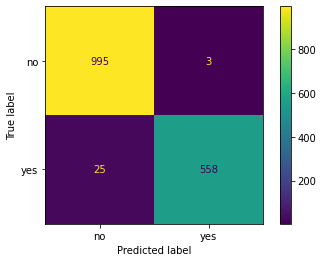

Hidden layers: (10, 10, 10)  | FNR: 4.29  %  | FPR: 0.5  % |



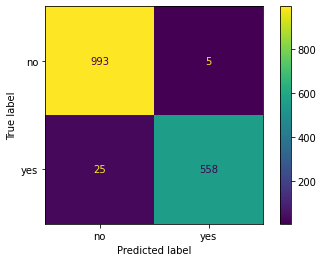

Hidden layers: (50, 50, 50)  | FNR: 4.12  %  | FPR: 0.3  % |



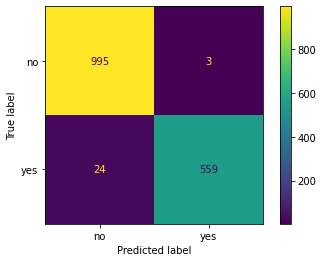

Hidden layers: (100, 100, 100)  | FNR: 3.95  %  | FPR: 0.4  % |



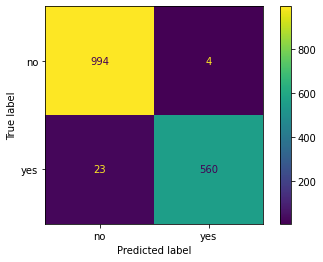

Hidden layers: (150, 150, 150)  | FNR: 4.12  %  | FPR: 0.3  % |



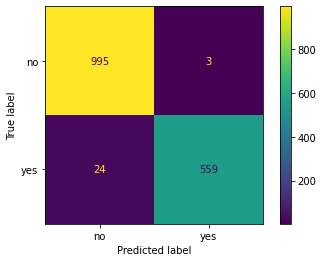

Hidden layers: (200, 200, 200)  | FNR: 3.43  %  | FPR: 1.4  % |



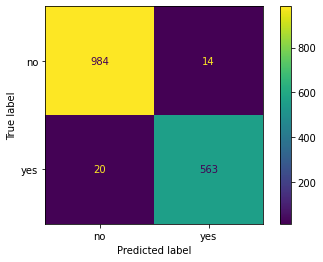

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.33)

neurons_arr = [10, 50, 100, 150, 200]
layers_arr = [1, 2, 3]

for layer in layers_arr:
    if (layer == 1):
        fnr_arr = []
        fpr_arr = []
        for neurons in neurons_arr:
            fnr, fpr = MultiLayerPerceptronClassification(layers = (neurons))
            fnr_arr.append(fnr)
            fpr_arr.append(fpr)
    elif (layer == 2):
        fnr2_arr = []
        fpr2_arr = []
        for neurons in neurons_arr:
            fnr, fpr = MultiLayerPerceptronClassification(layers = (neurons, neurons))
            fnr2_arr.append(fnr)
            fpr2_arr.append(fpr)
    else:
        fnr3_arr = []
        fpr3_arr = []
        for neurons in neurons_arr:
            fnr, fpr = MultiLayerPerceptronClassification(layers = (neurons, neurons, neurons))
            fnr3_arr.append(fnr)
            fpr3_arr.append(fpr)

### Wykres FNR w zależności od liczby neuronów i warstw ukrytych

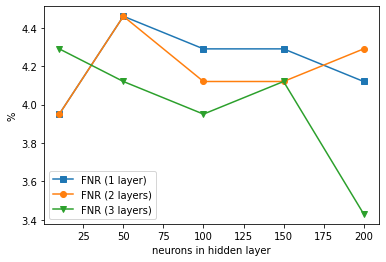

In [4]:
plt.plot(neurons_arr, fnr_arr, label = "FNR (1 layer)", marker='s')
plt.plot(neurons_arr, fnr2_arr, label = "FNR (2 layers)", marker='o')
plt.plot(neurons_arr, fnr3_arr, label = "FNR (3 layers)", marker='v')
plt.xlabel('neurons in hidden layer')
plt.ylabel('%')
plt.legend()
plt.show()

### Wykres FPR w zależności od liczby neuronów i warstw ukrytych

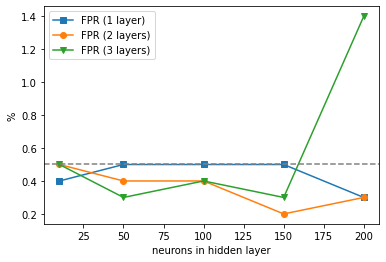

In [5]:
plt.plot(neurons_arr, fpr_arr, label = "FPR (1 layer)", marker='s')
plt.plot(neurons_arr, fpr2_arr, label = "FPR (2 layers)", marker='o')
plt.plot(neurons_arr, fpr3_arr, label = "FPR (3 layers)", marker='v')
plt.xlabel('neurons in hidden layer')
plt.ylabel('%')
plt.legend()
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.show()

## Redukcja wymiarowości danych (feature selection)

* PCA - n_components (25, 50, 100, 200, 300)

N_components: 25 

Hidden layers: (100, 100, 100)  | FNR: 3.77  %  | FPR: 1.0  % |



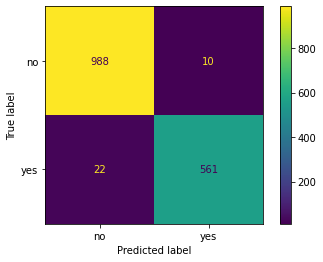

N_components: 50 

Hidden layers: (100, 100, 100)  | FNR: 4.63  %  | FPR: 1.1  % |



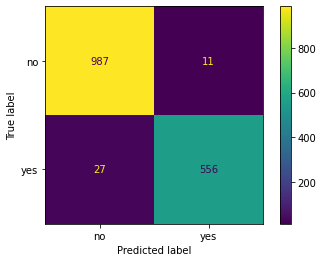

N_components: 100 

Hidden layers: (100, 100, 100)  | FNR: 3.95  %  | FPR: 0.8  % |



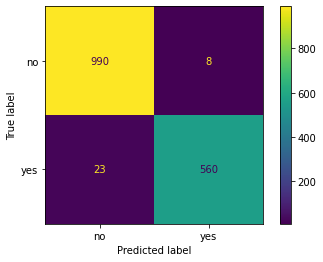

N_components: 200 

Hidden layers: (100, 100, 100)  | FNR: 3.95  %  | FPR: 0.6  % |



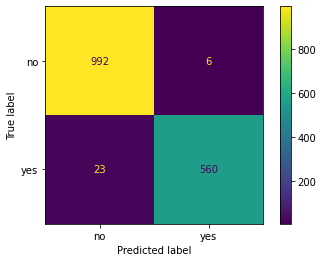

N_components: 300 

Hidden layers: (100, 100, 100)  | FNR: 3.77  %  | FPR: 0.8  % |



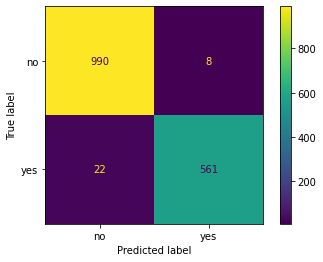

In [6]:
from sklearn.decomposition import PCA

components_arr = [25, 50, 100, 200, 300]

fnr_arr = []
fpr_arr = []

for n in components_arr:

    pca = PCA(n_components = n, random_state = 123)

    X_pca = pca.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=123, test_size=0.33)

    print('N_components:', n, '\n')
    
    fnr, fpr = MultiLayerPerceptronClassification(layers = (100, 100, 100))
    
    fnr_arr.append(fnr)
    fpr_arr.append(fpr)

### Wykres FNR w zależności od n kompentów redukcji PCA

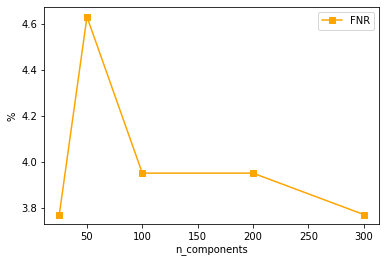

In [7]:
plt.plot(components_arr, fnr_arr, label = "FNR", marker='s', color='orange')
plt.xlabel('n_components')
plt.ylabel('%')
plt.legend()
plt.show()

### Wykres FPR w zależności od n kompentów redukcji PCA

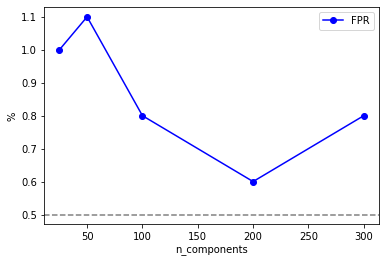

In [8]:
plt.plot(components_arr, fpr_arr, label = "FPR", marker='o', color='blue')
plt.xlabel('n_components')
plt.ylabel('%')
plt.legend()
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.show()

### Wykres porównawczy FNR i FPR w zależności od n kompentów redukcji PCA

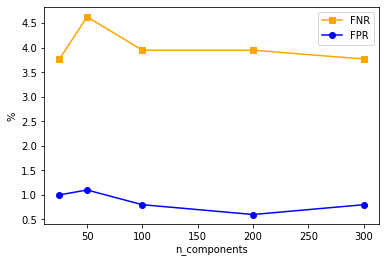

In [9]:
plt.plot(components_arr, fnr_arr, label = "FNR", marker='s', color='orange')
plt.plot(components_arr, fpr_arr, label = "FPR", marker='o', color='blue')
plt.xlabel('n_components')
plt.ylabel('%')
plt.legend()
plt.show()